In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors


import numpy as np

import statsmodels.api as sm

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
storms = pd.read_csv("storms.csv")
storms_2015 = storms[storms['year'] == 2015]
storms_2015

,name,year,month,day,hour,lat,long,status,category,wind,pressure,ts_diameter,hu_diameter
9790,Ana,2015,5,9,6,32.2,-77.5,tropical storm,0,50,998,230.1560,0.0000
9791,Ana,2015,5,9,12,32.5,-77.8,tropical storm,0,50,1001,230.1560,0.0000
9792,Ana,2015,5,9,18,32.7,-78.0,tropical storm,0,45,1001,230.1560,0.0000
9793,Ana,2015,5,10,0,33.1,-78.3,tropical storm,0,45,1001,184.1248,0.0000
9794,Ana,2015,5,10,6,33.5,-78.6,tropical storm,0,40,1002,172.6170,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,Kate,2015,11,10,18,31.2,-74.0,tropical storm,0,60,993,103.5702,0.0000
10006,Kate,2015,11,11,0,33.1,-71.3,hurricane,1,65,990,161.1092,23.0156
10007,Kate,2015,11,11,6,35.2,-67.6,hurricane,1,70,985,207.1404,23.0156
10008,Kate,2015,11,11,12,36.2,-62.5,hurricane,1,75,980,345.2340,34.5234


In [ ]:
economics = pd.read_csv("economics.csv")

In [ ]:
eredivisie = pd.read_csv("eredivisie.csv")

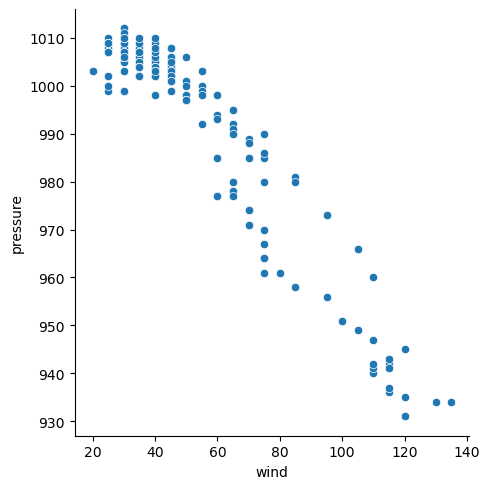

In [ ]:
sns.relplot(data = storms_2015, x = "wind", y = "pressure")

plt.show()

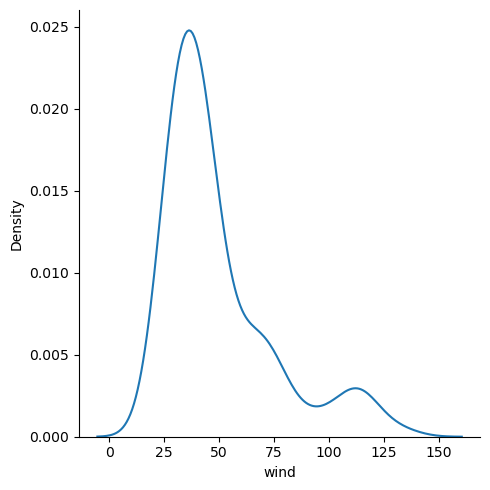

In [ ]:
sns.displot(storms_2015, x = "wind", kind = "kde")

plt.show()

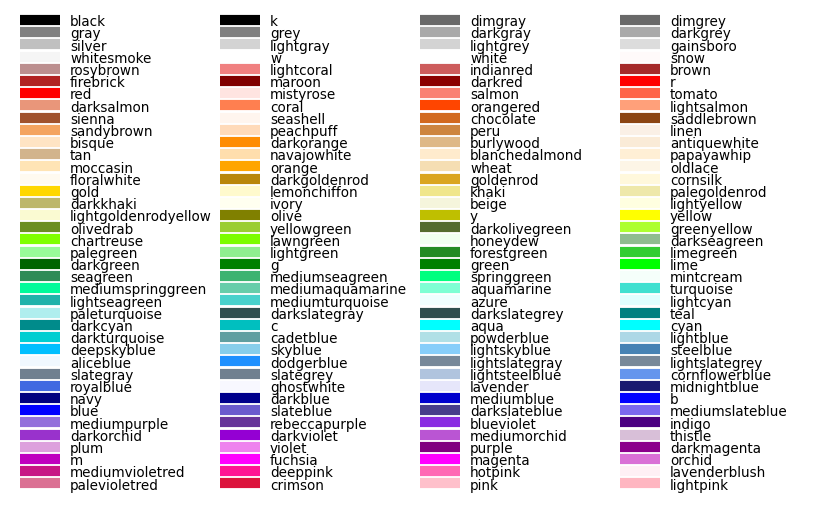

In [ ]:
# Named colors and its visual representation.

# Get the colors from matplotlib
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

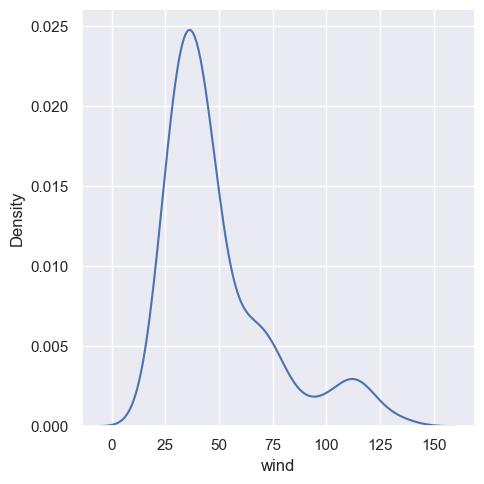

In [ ]:
# Change style sheet to seaborns 'default' and show density plot again
sns.set()

sns.displot(data = storms_2015, x = 'wind', kind = 'kde')

plt.show()

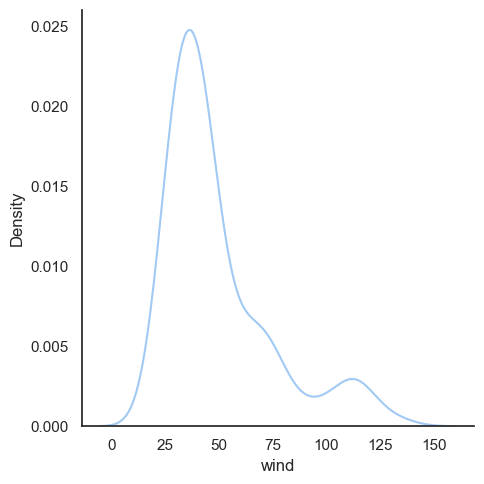

In [ ]:
# Or use for example a white theme with pastel colors
sns.set_theme(style="white", palette= 'pastel')

sns.displot(data = storms_2015, x = 'wind', kind = 'kde')

plt.show()

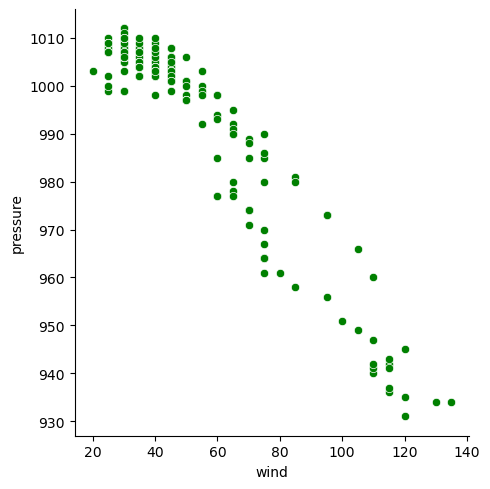

In [ ]:
# Reset style changes
sns.reset_defaults()

sns.relplot(data = storms_2015, x = 'wind', y = 'pressure',  color = "green")

plt.show()


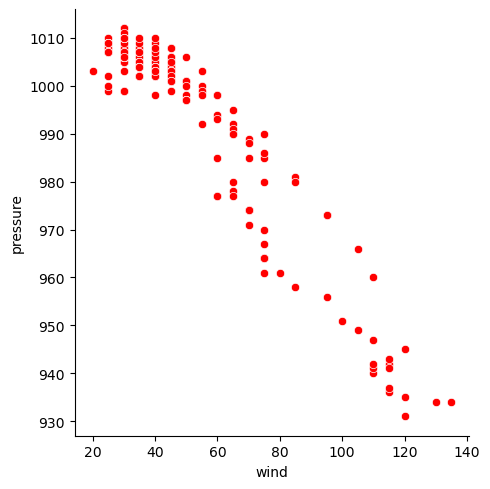

In [ ]:
sns.relplot(data = storms_2015, x = "wind", y = "pressure", color = "red")
plt.show()

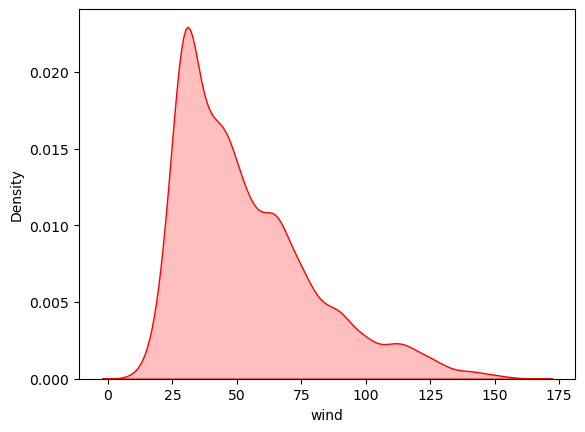

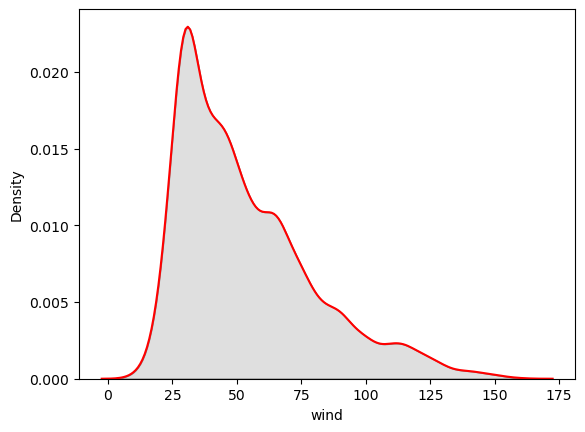

In [ ]:
# Displot is calls the function kdeplot (it is a wrapper for the kde plot).
# Kdeplot is more flexible and allows for more options than displot.
# We need to use kdeplot if we want to color the area under the line.
sns.kdeplot(storms, x = "wind", color = "red", fill= True)
plt.show()

# If we want the area under the curve to have a different color, we need
# to call the kdeplot-function twice. 
# We first create the density plot with the filled area and then 
# we call the function again, but with a different color for the line.

sns.kdeplot(data = storms, x = "wind", color = 'grey', fill=True)
sns.kdeplot(data = storms, x = 'wind', color = 'red')
plt.show()

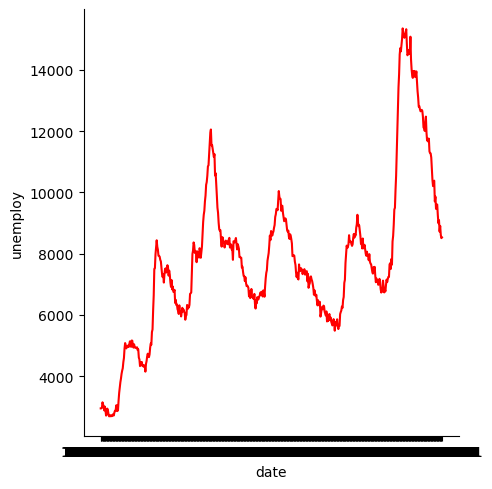

In [ ]:
sns.relplot(economics, kind = "line", x = "date", y = "unemploy", color = "red")

plt.show()

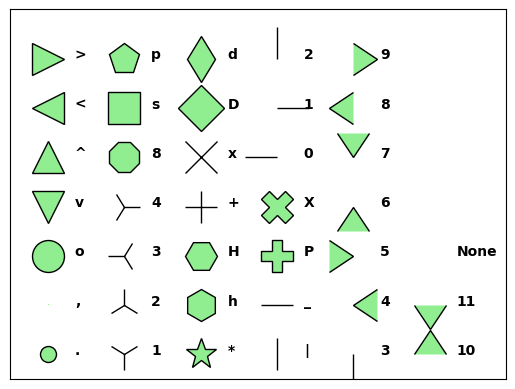

In [ ]:
all_poss = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', ' ', '', None]
 
# set the limit of x and y axis:
plt.xlim(0.5,7)
plt.ylim(0.5,8)
 
# remove ticks and values of axis:
plt.xticks([])
plt.yticks([])
 
# Make a loop to add markers one by one
num=0
for x in range(1,7):
    for y in range(1,8):
        num += 1
        if num <= len(all_poss):
            plt.plot(x, y, marker = all_poss[num-1], markerfacecolor = 'lightgreen', 
                     markersize = 23, markeredgecolor = "black")
            plt.text(x + 0.35, y, all_poss[num-1], horizontalalignment = 'left', 
                     size = 'medium', color = 'black', weight = 'semibold')
            
            
plt.show()

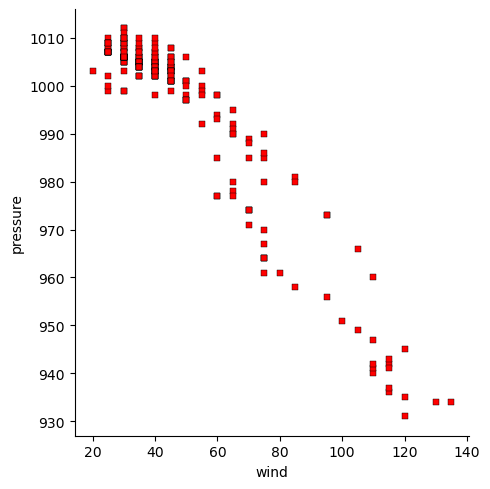

In [ ]:
sns.relplot(data = storms_2015, x = "wind", y = "pressure", marker = "s",
            color = "red", edgecolor = "black", s = 15)

plt.show()

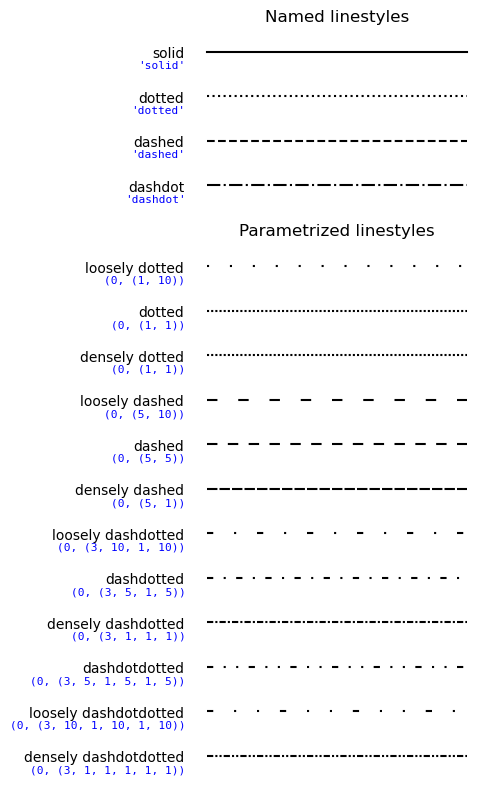

In [ ]:
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


def plot_linestyles(ax, linestyles, title):
    X, Y = np.linspace(0, 100, 10), np.zeros(10)
    yticklabels = []

    for i, (name, linestyle) in enumerate(linestyles):
        ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')
        yticklabels.append(name)

    ax.set_title(title)
    ax.set(ylim=(-0.5, len(linestyles)-0.5),
           yticks=np.arange(len(linestyles)),
           yticklabels=yticklabels)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.spines[:].set_visible(False)

    # For each line style, add a text annotation with a small offset from
    # the reference point (0 in Axes coords, y tick value in Data coords).
    for i, (name, linestyle) in enumerate(linestyles):
        ax.annotate(repr(linestyle),
                    xy=(0.0, i), xycoords=ax.get_yaxis_transform(),
                    xytext=(-6, -12), textcoords='offset points',
                    color="blue", fontsize=8, ha="right", family="monospace")


ax0, ax1 = (plt.figure(figsize=(5, 8))
            .add_gridspec(2, 1, height_ratios=[1, 3])
            .subplots())

plot_linestyles(ax0, linestyle_str[::-1], title='Named linestyles')
plot_linestyles(ax1, linestyle_tuple[::-1], title='Parametrized linestyles')

plt.tight_layout()
plt.show()

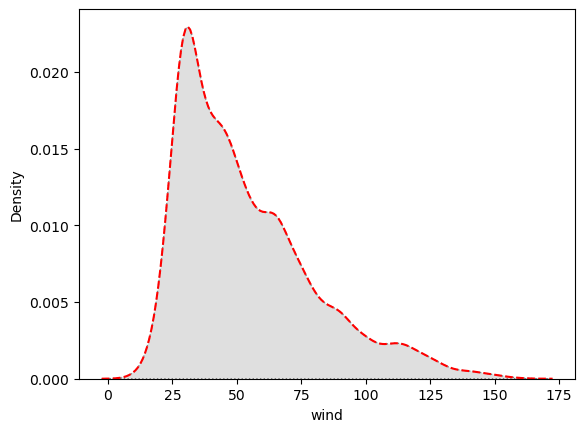

In [ ]:
sns.kdeplot(data = storms, x = "wind", color = 'grey', fill=True, linestyle = "dotted")
sns.kdeplot(data = storms, x = 'wind', color = 'red', linestyle = "dashed")
plt.show()

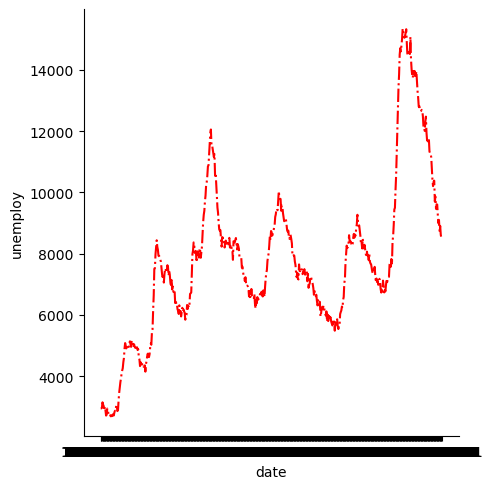

In [ ]:
sns.relplot(economics, kind = "line", x = "date", y = "unemploy", color = "red", linestyle = "dashdot")

plt.show()

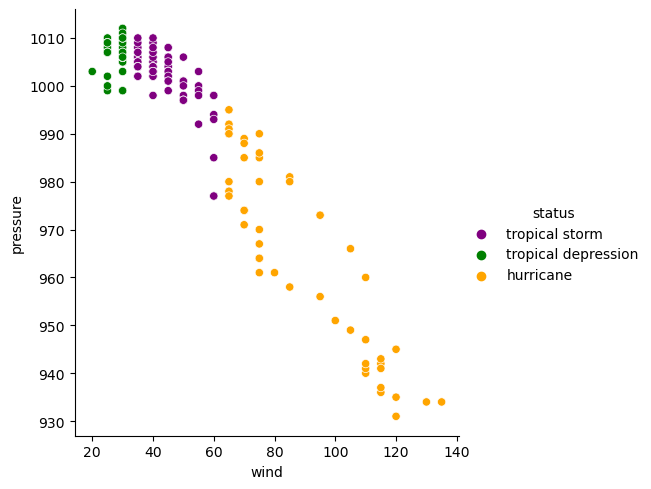

In [ ]:
sns.relplot(data = storms_2015, x = "wind", y = "pressure", hue = "status", palette = ['purple', 'green', 'orange'])
plt.show()

# Notice how it automatically adds a legend

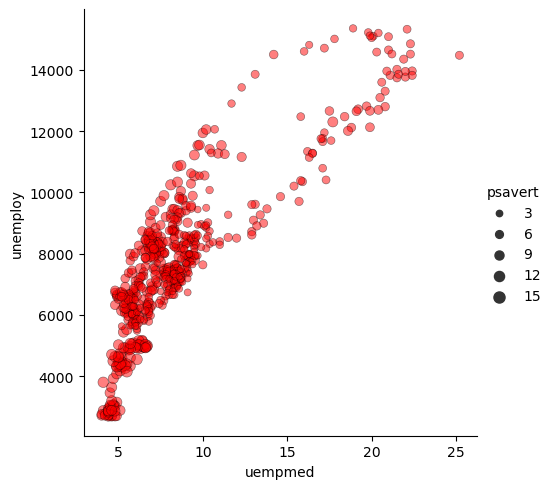

In [ ]:
# Let size be relative of a third variable
sns.relplot(data = economics, x = "uempmed", y = "unemploy", color = "red", edgecolor = "black",
            size = "psavert", alpha = 0.5)
plt.show()

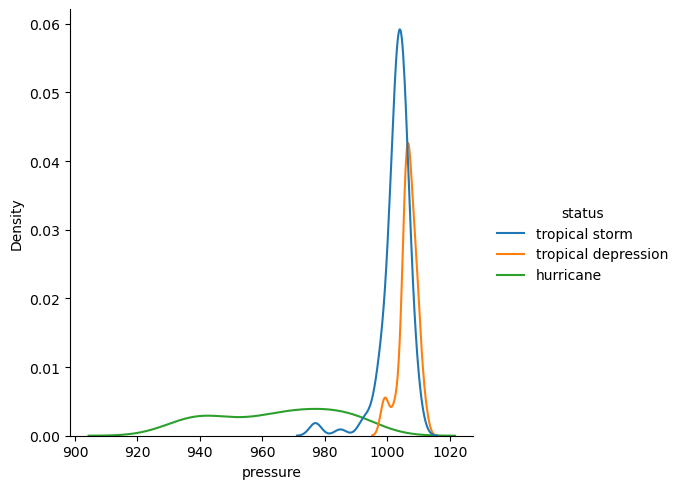

In [ ]:
# Use hue to create density plot for each status
sns.displot(storms_2015, x = "pressure", hue = "status", kind = "kde")
plt.show()

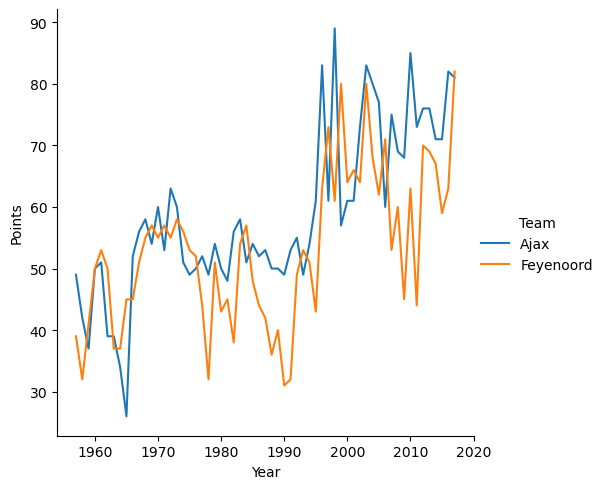

In [ ]:
sns.relplot(eredivisie, x = "Year", y = "Points", hue = "Team", kind = "line")

plt.show()

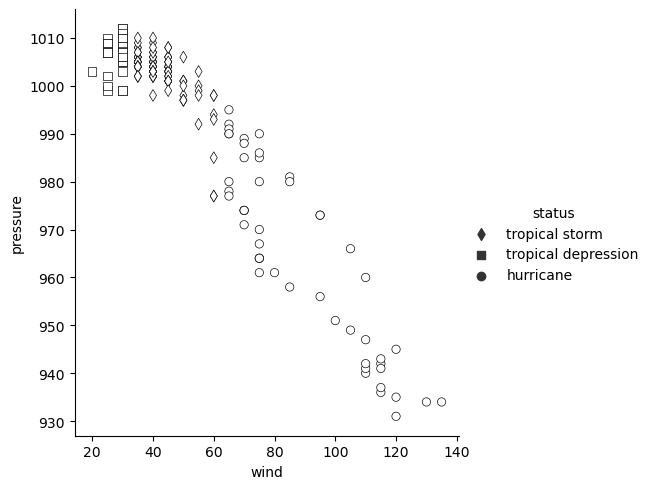

In [ ]:
sns.relplot(data = storms_2015, x = "wind", y = "pressure", style = "status", markers = ['d', 's', 'o'], 
            color = "white", edgecolor = "black")
plt.show()

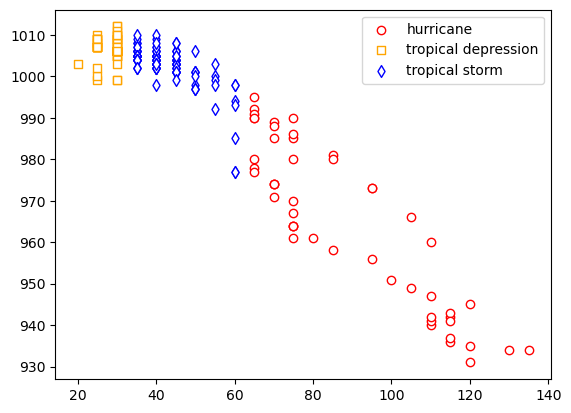

In [ ]:
# In this case it is actually easier to use matplotlib directly, rather than seaborn

# Create dictonary for colors and markers
colors = {'hurricane': 'red',
           'tropical depression': 'orange',
           'tropical storm': 'blue'}

markers = {'hurricane': 'o',
           'tropical depression': 's',
           'tropical storm': 'd'}

# Create scatter for each group seperately
groups = storms_2015.groupby('status')
for name, group in groups:
    plt.scatter(group.wind, group.pressure, label = name, 
                marker = markers[name], 
                c = "white", edgecolor = colors[name])

plt.legend()

plt.show()

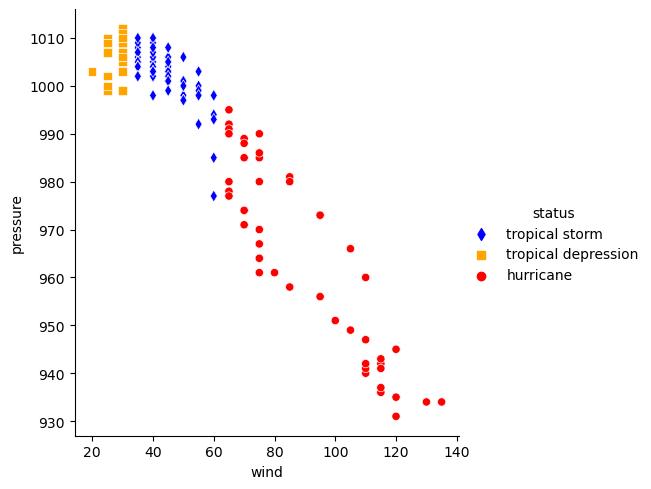

In [ ]:
# Or just fill the markers and ignore the edgecolors

sns.relplot(data = storms_2015, x = "wind", y = "pressure", 
            hue = "status", palette = ['blue', 'orange', "red"],
           style = "status", markers = ['d', 's', 'o'])
plt.show()

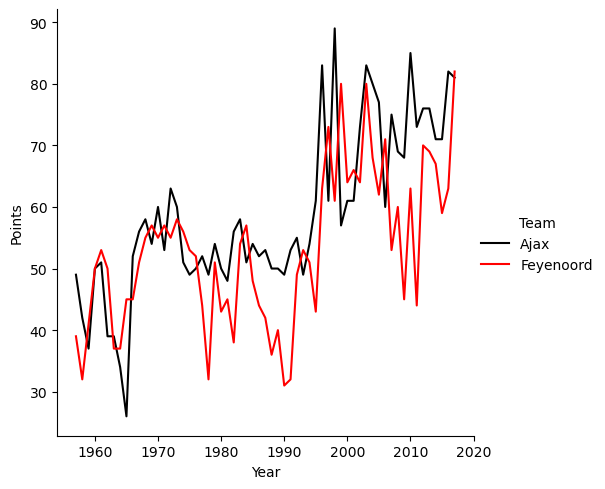

In [ ]:
#Set colors using a dictionary

sns.relplot(eredivisie, x = "Year", y = "Points", hue = "Team", 
            kind = "line", palette = {"Ajax": "black", "Feyenoord": "red"})

plt.show()

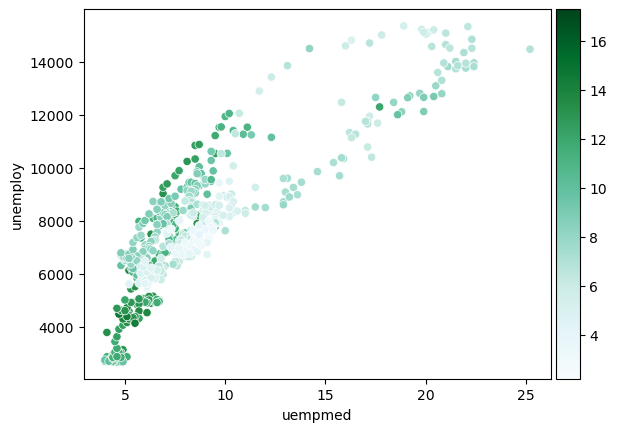

In [ ]:
ax = sns.scatterplot(data = economics, x = "uempmed", y = "unemploy", hue = "psavert", palette = "BuGn")

norm = plt.Normalize(economics['psavert'].min(), economics['psavert'].max())
smap = plt.cm.ScalarMappable(cmap="BuGn", norm=norm)
smap.set_array([])

# Remove the legend and add a colorbar
divider = make_axes_locatable(ax)
ax.get_legend().remove()
ax.figure.colorbar(smap, cax = divider.append_axes('right', size='5%', pad=0.05))

plt.show()

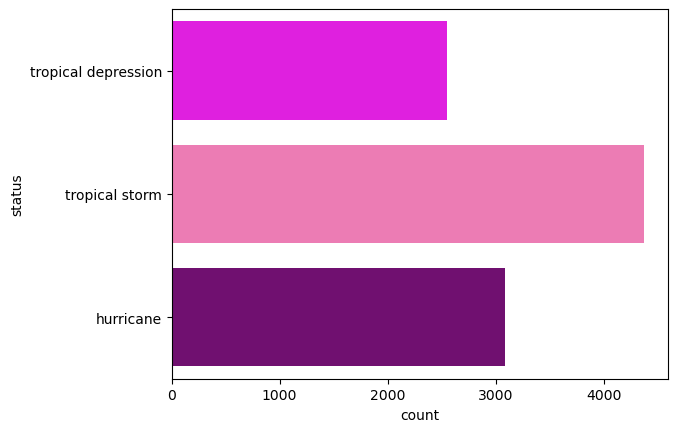

In [ ]:
# Change x to y to get a horizontal plot
sns.countplot(data = storms, y = 'status', 
              palette = ["magenta", "hotpink", "purple"])
plt.show()

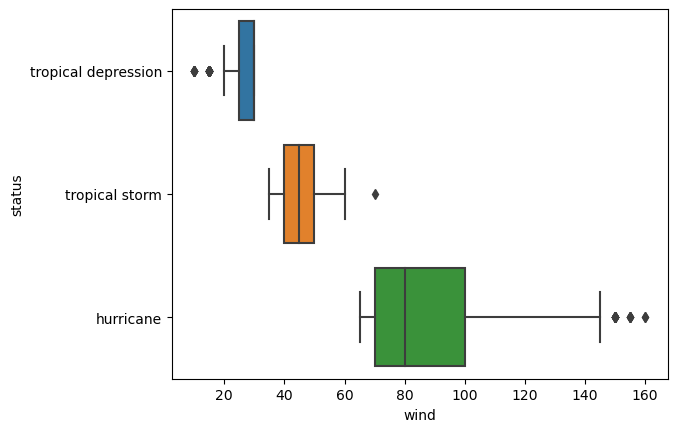

In [ ]:
sns.boxplot(data = storms, x = "wind", y = "status")
plt.show()

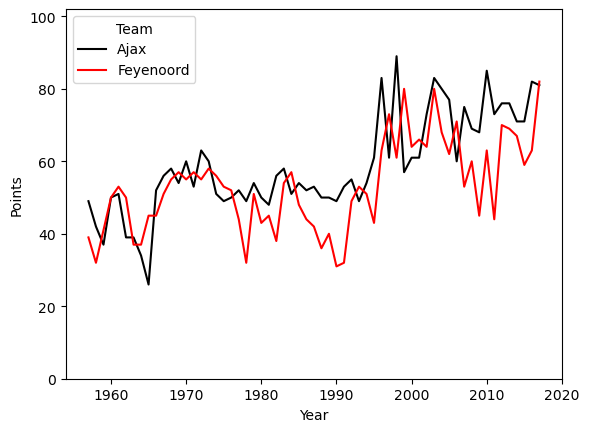

In [ ]:
# depict visualization
sns.lineplot(eredivisie, x = "Year", y = "Points", hue = "Team",
             palette = {"Ajax": "black", "Feyenoord": "red"})
ax = plt.gca()
ax.set_ylim(0, 102)

plt.show()

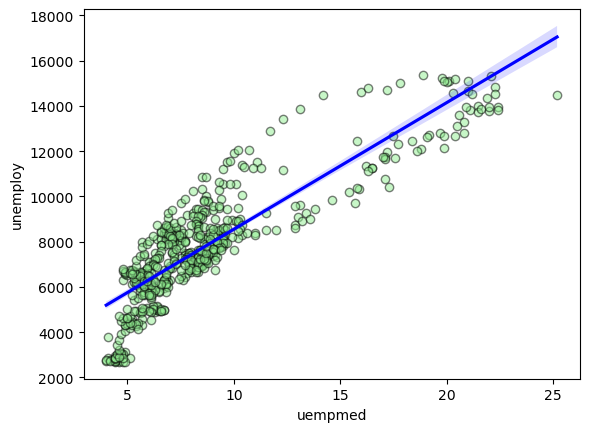

In [ ]:
sns.regplot(x = 'uempmed', y = 'unemploy', data = economics, 
           ci = 95, scatter_kws = {"alpha": 0.5, "edgecolors": "black", "color": "lightgreen"},
            line_kws = {"color": "blue"})
plt.show()

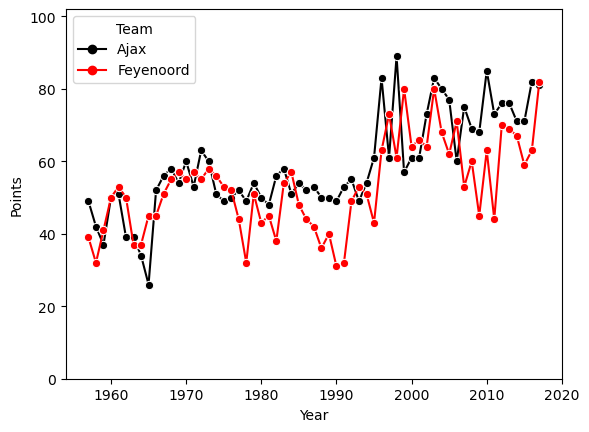

In [ ]:
# Create eredivisie plot and add a marker
sns.lineplot(eredivisie, x = "Year", y = "Points", hue = "Team",
             palette = {"Ajax": "black", "Feyenoord": "red"},
             style = "Team", dashes = False,
             markers= ["o", "o"])
ax = plt.gca()
ax.set_ylim(0, 102)

plt.show()

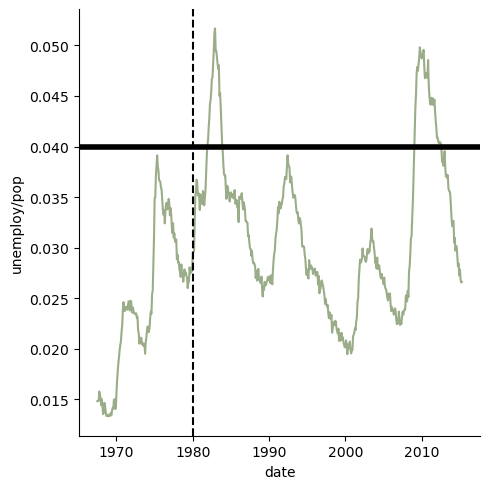

In [ ]:
# Turn date into a datetime type to get the axis correct
economics['date'] = pd.to_datetime(economics['date'])

# Calculate the unemployement relative to the population
economics['unemploy_pop'] = economics['unemploy']/economics['pop'] 

# Create figure
sns.relplot(economics, kind = "line", 
            x = "date", y = "unemploy_pop",
            color = "#9aad88")

# Add horizontal and vertical lines
plt.axhline(y = 0.04, c = "black", linewidth = 4) 
plt.axvline(x = pd.to_datetime("1980-01-01"), 
            c = "black", linestyle = "dashed")

# Axis labels and adjust ticks
plt.ylabel("unemploy/pop")
plt.xlabel("date")

plt.show()